In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,BatchNormalization,Dropout,GlobalAveragePooling2D
import matplotlib.pyplot as plt

kichcoanh = (64,64)
batch = 64
xulyanh_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)
xulyanh_valid = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)
teptrain = xulyanh_train.flow_from_directory(
    '/kaggle/input/data-tuan/kaggle/working/nmt_dataset',
    target_size = kichcoanh,
    batch_size = batch,
    class_mode = 'categorical',
    subset = 'training'  # Lấy 80% đầu
)
tepvalid = xulyanh_valid.flow_from_directory(
    '/kaggle/input/data-tuan/kaggle/working/nmt_dataset',
    target_size = kichcoanh,
    batch_size = batch,
    class_mode = 'categorical',
    subset = 'validation'  # Lấy 20% cuối
)

print("Số lượng classes:", len(teptrain.class_indices))
print("Training samples:", teptrain.samples)
print("Validation samples:", tepvalid.samples)

2025-08-17 16:57:47.256914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755449867.643651      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755449867.748377      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4640 images belonging to 29 classes.
Found 1160 images belonging to 29 classes.
Số lượng classes: 29
Training samples: 4640
Validation samples: 1160


In [2]:
# Mô hình CNN đơn giản cho chữ cái
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # Classifier đơn giản
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Dropout nhẹ
    Dense(29, activation='softmax')
])

# Compile đơn giản
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())
print(f"Tổng số parameters: {model.count_params():,}")
# Training với epochs ít hơn
history = model.fit(
    teptrain,
    epochs=25,  # Giảm epochs
    validation_data=tepvalid,
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755449890.917964      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755449890.918674      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,941 (2.62 MB)

 Trainable params: 686,941 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

None
Tổng số parameters: 686,941


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


I0000 00:00:1755449895.824168      77 service.cc:148] XLA service 0x7fd284006590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755449895.826146      77 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755449895.826169      77 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755449896.246207      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/73 ━━━━━━━━━━━━━━━━━━━━ 7:41 6s/step - accuracy: 0.0156 - loss: 3.3796

I0000 00:00:1755449899.772666      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 432ms/step - accuracy: 0.0310 - loss: 3.3712 - val_accuracy: 0.0819 - val_loss: 3.3369
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - accuracy: 0.0810 - loss: 3.2442 - val_accuracy: 0.2147 - val_loss: 2.9766
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.1871 - loss: 2.7840 - val_accuracy: 0.3017 - val_loss: 2.4848
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.2765 - loss: 2.4083 - val_accuracy: 0.3259 - val_loss: 2.2332
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.3428 - loss: 2.0851 - val_accuracy: 0.4560 - val_loss: 1.9676
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.4032 - loss: 1.8935 - val_accuracy: 0.4431 - val_loss: 1.8537
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.4664 - loss: 1.6660 - val_accuracy: 0.5026 - val_loss: 1.6682
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.4990 - loss: 1.5259 - val_accuracy: 0.533

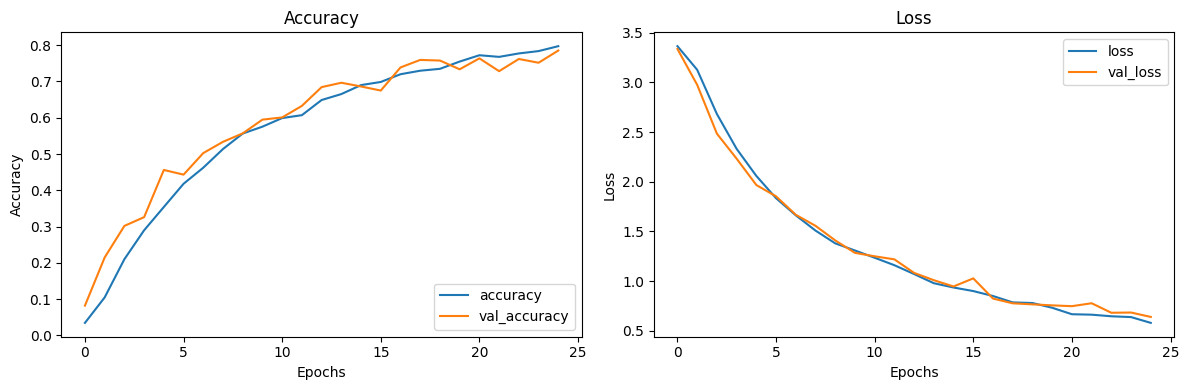

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot first graph
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title('Accuracy')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Loss')

plt.tight_layout()
plt.show()

In [4]:
metrics = history.history
final_metrics = {key: values[-1] for key, values in metrics.items()}

print(final_metrics)

{'accuracy': 0.7974137663841248, 'loss': 0.5801420211791992, 'val_accuracy': 0.7853448390960693, 'val_loss': 0.6400770545005798}


In [5]:
# Save metrics value to JSON file
import json
from pathlib import Path

final_metrics["model_name"] = "nguyen minh tuan's model"

results_path = Path("/kaggle/working/")/"nmt_model.json"
results_path.parent.mkdir(exist_ok=True)

with open(results_path, "w") as f:
  json.dump(final_metrics, f, indent=4)

print(f"Saved results to {results_path}")


Saved results to /kaggle/working/nmt_model.json
